In [23]:
#import libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read train data:
df_train = pd.read_csv('house_prices_train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df_train = df_train.drop('Alley', axis=1) 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

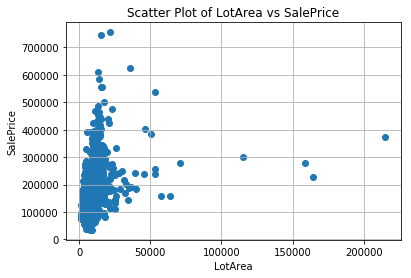

In [4]:
plt.scatter(df_train['LotArea'], df_train['SalePrice'])
plt.title('Scatter Plot of LotArea vs SalePrice')    # title
plt.xlabel('LotArea') # label_x
plt.ylabel('SalePrice')    # label_y
plt.grid()                                 # grid_line

plt.show() 

In [5]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [21]:
print(df_train.shape)
print(df_train.isnull().sum())

(1460, 80)
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81

In [17]:
df_new = df_train.drop(['FireplaceQu','PoolQC', 'Fence', 'MiscFeature', ], axis=1)


In [29]:
print(df_new.shape)
df_new.info()

(1460, 76)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd   

In [24]:
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
print(df_new['LotFrontage'].mean())

70.04995836802665


In [30]:
#changing certain columns into numerical data
dummy_msz = pd.get_dummies(df_new['MSZoning'])
dummy_street = pd.get_dummies(df_new['Street'])
dummy_lotshape = pd.get_dummies(df_new['LotShape'])
dummy_landcontour = pd.get_dummies(df_new['LandContour']) 
dummy_utilities = pd.get_dummies(df_new['Utilities']) 
dummy_lotconfig = pd.get_dummies(df_new['LotConfig']) 
dummy_landslope = pd.get_dummies(df_new['LandSlope']) 
dummy_neighborhood = pd.get_dummies(df_new['Neighborhood']) 
dummy_condition1 = pd.get_dummies(df_new['Condition1']) 
dummy_condition2 = pd.get_dummies(df_new['Condition2']) 
dummy_bldgtype = pd.get_dummies(df_new['BldgType']) 
dummy_housestyle = pd.get_dummies(df_new['HouseStyle']) 



In [33]:
#train_data_Merge 
df_merge = pd.concat([df_new, dummy_msz, dummy_street, dummy_lotshape, dummy_landcontour, dummy_utilities,
                     dummy_lotconfig, dummy_landslope, dummy_neighborhood, dummy_condition1, dummy_condition2,
                     dummy_bldgtype, dummy_housestyle], axis = 1)
df_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,1,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,1,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_new_2 = df_merge.drop(['MSZoning','Street', 'LotShape', 'LandContour' , 'Utilities','LotConfig', 'LandSlope',
                         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'], axis=1)
df_new_2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,1,60,65.0,8450,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0


In [65]:
df_new_3 = df_new_2[['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GarageCars',
                     'GrLivArea','GarageArea', 'Fireplaces','FullBath','LotArea','SalePrice', ]]
df_new_3.head()

,MSSubClass,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageCars,GrLivArea,GarageArea,Fireplaces,FullBath,LotArea,SalePrice
0,60,7,2003,2003,856,2,1710,548,0,2,8450,208500
1,20,6,1976,1976,1262,2,1262,460,1,2,9600,181500
2,60,7,2001,2002,920,2,1786,608,1,2,11250,223500
3,70,7,1915,1970,756,3,1717,642,1,1,9550,140000
4,60,8,2000,2000,1145,3,2198,836,1,2,14260,250000


In [66]:
# Labels are the values we want to predict
labels = np.array(df_new_3['SalePrice'])

# Remove the labels from the features
# axis 1 refers to the columns
features = df_new_3.drop('SalePrice', axis = 1)

features.head()

,MSSubClass,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageCars,GrLivArea,GarageArea,Fireplaces,FullBath,LotArea
0,60,7,2003,2003,856,2,1710,548,0,2,8450
1,20,6,1976,1976,1262,2,1262,460,1,2,9600
2,60,7,2001,2002,920,2,1786,608,1,2,11250
3,70,7,1915,1970,756,3,1717,642,1,1,9550
4,60,8,2000,2000,1145,3,2198,836,1,2,14260


In [67]:
print(features.shape)
print(labels.shape)

(1460, 11)
(1460,)


In [68]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)


In [113]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1022, 11)
Training Labels Shape: (1022,)
Testing Features Shape: (438, 11)
Testing Labels Shape: (438,)


In [114]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 11 columns):
MSSubClass      1022 non-null int64
OverallQual     1022 non-null int64
YearBuilt       1022 non-null int64
YearRemodAdd    1022 non-null int64
TotalBsmtSF     1022 non-null int64
GarageCars      1022 non-null int64
GrLivArea       1022 non-null int64
GarageArea      1022 non-null int64
Fireplaces      1022 non-null int64
FullBath        1022 non-null int64
LotArea         1022 non-null int64
dtypes: int64(11)
memory usage: 95.8 KB


In [115]:
from sklearn.linear_model import LinearRegression

#Regression model
multi_lreg = LinearRegression()

multi_lreg.fit(train_features, train_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
print(multi_lreg.score(train_features, train_labels))

0.7754617297593492


In [77]:
print(multi_lreg.score(test_features,test_labels))

0.8012999820755381


In [78]:
df_test = pd.read_csv('house_prices_test.csv')

In [116]:
df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [117]:
df_test_2= df_test[['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GarageCars',
                     'GrLivArea','GarageArea', 'Fireplaces','FullBath','LotArea', ]]
df_test_2.head()

,MSSubClass,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageCars,GrLivArea,GarageArea,Fireplaces,FullBath,LotArea
0,20,5,1961,1961,882.0,1.0,896,730.0,0,1,11622
1,20,6,1958,1958,1329.0,1.0,1329,312.0,0,1,14267
2,60,5,1997,1998,928.0,2.0,1629,482.0,1,2,13830
3,60,6,1998,1998,926.0,2.0,1604,470.0,1,2,9978
4,120,8,1992,1992,1280.0,2.0,1280,506.0,0,2,5005


In [118]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
MSSubClass      1459 non-null int64
OverallQual     1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
TotalBsmtSF     1458 non-null float64
GarageCars      1458 non-null float64
GrLivArea       1459 non-null int64
GarageArea      1458 non-null float64
Fireplaces      1459 non-null int64
FullBath        1459 non-null int64
LotArea         1459 non-null int64
dtypes: float64(3), int64(8)
memory usage: 125.5 KB


In [119]:
df_test_3 = df_test_2.fillna(df_test_2.mean())
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
MSSubClass      1459 non-null int64
OverallQual     1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
TotalBsmtSF     1459 non-null float64
GarageCars      1459 non-null float64
GrLivArea       1459 non-null int64
GarageArea      1459 non-null float64
Fireplaces      1459 non-null int64
FullBath        1459 non-null int64
LotArea         1459 non-null int64
dtypes: float64(3), int64(8)
memory usage: 125.5 KB


In [120]:
df_test_3.isnull().sum()

MSSubClass      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GarageCars      0
GrLivArea       0
GarageArea      0
Fireplaces      0
FullBath        0
LotArea         0
dtype: int64

In [121]:
# Prediction of SalePrice
X_pred = np.array(df_test_3)
y_pred = multi_lreg.predict(X_pred)
print (y_pred)

[111312.25058302 152911.88706939 180904.32571453 ... 167343.36158643
 105291.8286375  247425.90904546]


In [122]:
df_test['SalePrice'] = y_pred
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,111312.250583
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,152911.887069
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180904.325715
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,197577.909522
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,199810.490349


In [124]:
df_submission = df_test[['Id','SalePrice']]
df_submission.head()

,Id,SalePrice
0,1461,111312.250583
1,1462,152911.887069
2,1463,180904.325715
3,1464,197577.909522
4,1465,199810.490349


In [125]:
df_submission.to_csv("df_submit_house_prices.csv", index=False)